In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")

In [222]:
def convert_money(value):
       value = value.replace(',', '')
       return float(value)

In [223]:
data = pd.read_csv("SP5002018.csv", parse_dates = ["Date"], index_col = "Date")

In [224]:
data = data.drop(columns=['Open', 'High','Low'])

In [225]:
data['Close'] = data['Close'].apply(convert_money)

In [226]:
data["shift"] =data.div(data.shift(1))

In [227]:
data["returns"] = np.log(data["shift"])

In [228]:
data.dropna(inplace = True)

In [229]:
SMA = 30

In [230]:
data["SMA"] = data["Close"].rolling(SMA).mean()

In [231]:
data["Lower"] = data["SMA"] - data["Close"].rolling(SMA).std() * 2

In [232]:
data["Upper"] = data["SMA"] + data["Close"].rolling(SMA).std() * 2

In [233]:
data.dropna(inplace = True)

In [234]:
data["distance"] = data.Close - data.SMA # helper Column

In [235]:
data["position"] = np.where(data.Close < data.Lower, 1, np.nan) # 1. oversold -> go long

In [236]:
data["position"] = np.where(data.Close > data.Upper, -1, data["position"]) # 2. overbought -> go short

In [237]:
data["position"] = np.where(data.distance * data.distance.shift(1) < 0, 0, data["position"])

In [238]:
data["position"] = data.position.ffill().fillna(0) # where 1-3 isn´t applicable -> hold previous position

In [239]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [240]:
data.dropna(inplace = True)

In [241]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [242]:
data["trades"] = data.position.diff().fillna(0).abs()

In [243]:
data.to_csv("SP5002018CLEAN.csv",index=False)

In [244]:
data.position.value_counts()

 0.0    102
 1.0     70
-1.0     48
Name: position, dtype: int64

In [245]:
data.trades.value_counts()

0.0    206
1.0     14
Name: trades, dtype: int64

In [246]:
data

,Close,shift,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy,trades
Date,,,,,,,,,,,,
2018-11-13,2722.18,1.007625,0.007596,2629.631000,2410.727570,2848.534430,92.549000,0.0,0.0,1.007625,1.000000,0.0
2018-11-12,2726.22,1.001484,0.001483,2637.544000,2422.574330,2852.513670,88.676000,0.0,0.0,1.009121,1.000000,0.0
2018-11-09,2781.01,1.020097,0.019898,2647.987667,2436.751532,2859.223801,133.022333,0.0,0.0,1.029401,1.000000,0.0
2018-11-08,2806.83,1.009284,0.009242,2663.178667,2476.126871,2850.230462,143.651333,0.0,0.0,1.038959,1.000000,0.0
2018-11-07,2813.89,1.002515,0.002512,2676.421000,2506.095688,2846.746312,137.469000,0.0,0.0,1.041572,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-08,2747.71,0.998699,-0.001302,2757.250667,2605.895203,2908.606130,-9.540667,0.0,-0.0,1.017075,1.127057,0.0
2018-01-05,2743.15,0.998340,-0.001661,2758.147000,2607.479087,2908.814913,-14.997000,0.0,-0.0,1.015387,1.127057,0.0
2018-01-04,2723.99,0.993015,-0.007009,2757.872667,2606.979611,2908.765723,-33.882667,0.0,-0.0,1.008295,1.127057,0.0


In [247]:
import seaborn as sns
sns.color_palette("Spectral", as_cmap=True)
plt.style.use("seaborn-deep")

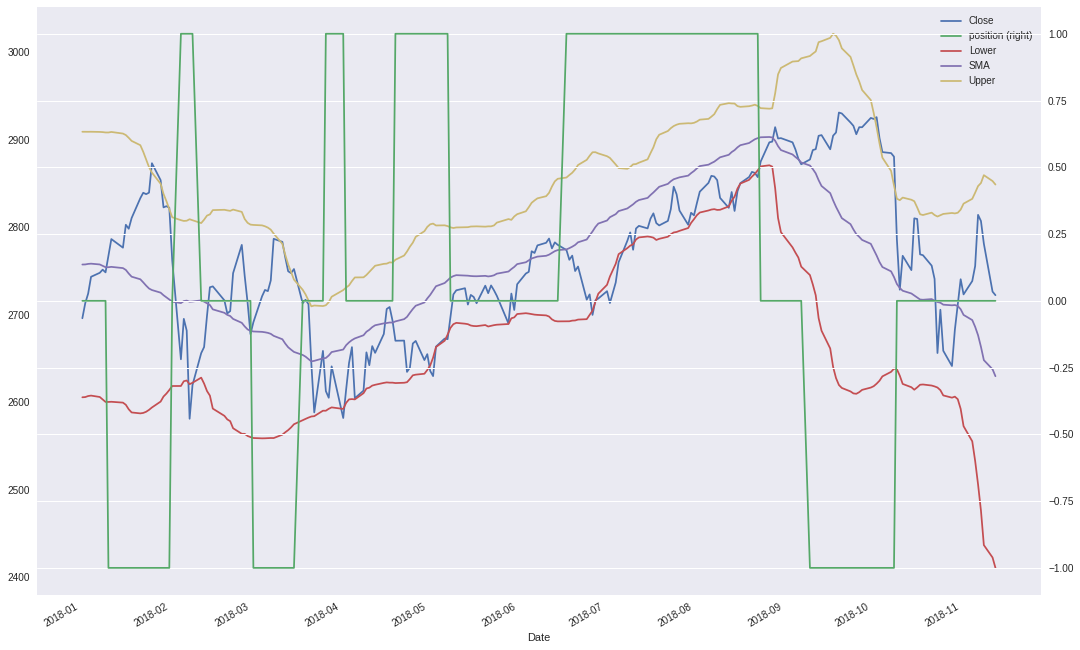

In [248]:
data[["Close","position", "Lower","SMA","Upper"]].plot(figsize = (18, 12), secondary_y = "position")
plt.show()